Copyright (c) 2023, Douglas Santry
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, is permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.
2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR
ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import OneHotEncoder

import numpy as np

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

import time

In [2]:
#
# Load the data set
#
iris = pd.read_csv ("../Data/iris.csv")

# Pre-process our continuous features. §3.1
#  1. Scale
#  2. Translate

data = iris # keep a copy of the original data

for feature in data:
    if is_numeric_dtype (data[feature]):
        data[feature] -= data[feature].mean ()      # translate to center the data
        data[feature] /= data[feature].std ()       # scale by Z-Score


In [3]:
dataset = data.values                      # Extract the values from the dataframe into an array
x = dataset[:, 0:4].astype(float)          # Split off our input features


In [4]:
SpeciesToVector = OneHotEncoder (sparse=False)
TrainingLabels = SpeciesToVector.fit_transform (data.loc[:, ["species"]])

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">We have prepared our data, now build the ANN</p>

In [5]:
def BuildIrisClassifier (topology):

    model = Sequential()                                                # Keras container for our model

    model.add (Dense (topology[0], input_dim=4, activation='sigmoid'))  # input vector of dim 4
    model.add (Dense (topology[1], activation='sigmoid'))               # Second layer, 8 neurons

    model.add (Dense (3, activation='softmax'))                         # Softmax layer

    model.compile (loss='categorical_crossentropy', optimizer='adam')   # Build our ANN
    
    return model



<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">We have our training data, and our ANN, we can train the ANN now.</p>

In [6]:

epochs = 100

input_layer = range (1, 14, 3)
hidden_layer = range (1, 14, 3)

Loss = []
Accuracy = []

for i in input_layer:
    for h in hidden_layer:
        
        model = BuildIrisClassifier ([i, h])

        history = model.fit (x, TrainingLabels, verbose=False, epochs = epochs)
        
        Loss.append (history.history["loss"][epochs - 1])
        
        Y = model.predict (x, verbose=False)
        Accuracy.append (sum (sum (TrainingLabels[Y.argmax (axis=-1)] == 1)) / 150)

2023-12-21 16:43:19.401548: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-21 16:43:19.401671: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-12-21 16:43:19.488179: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1


2023-12-21 16:43:19.648072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:43:22.301422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:43:22.578509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:43:25.252413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:43:25.458655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:43:28.149147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:43:28.354570: I tensorflow/core/grappler/optimizers/cust

In [7]:
inputLayer, hiddenLayer = np.mgrid[input_layer, hidden_layer]

In [8]:
Z = np.reshape (Accuracy, (len (input_layer), len (hidden_layer)))

Z

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

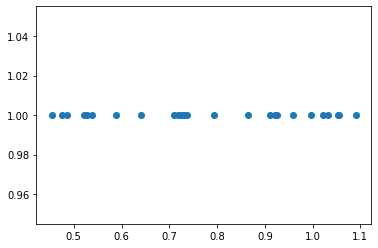

In [9]:

plt.scatter (Loss, Accuracy)

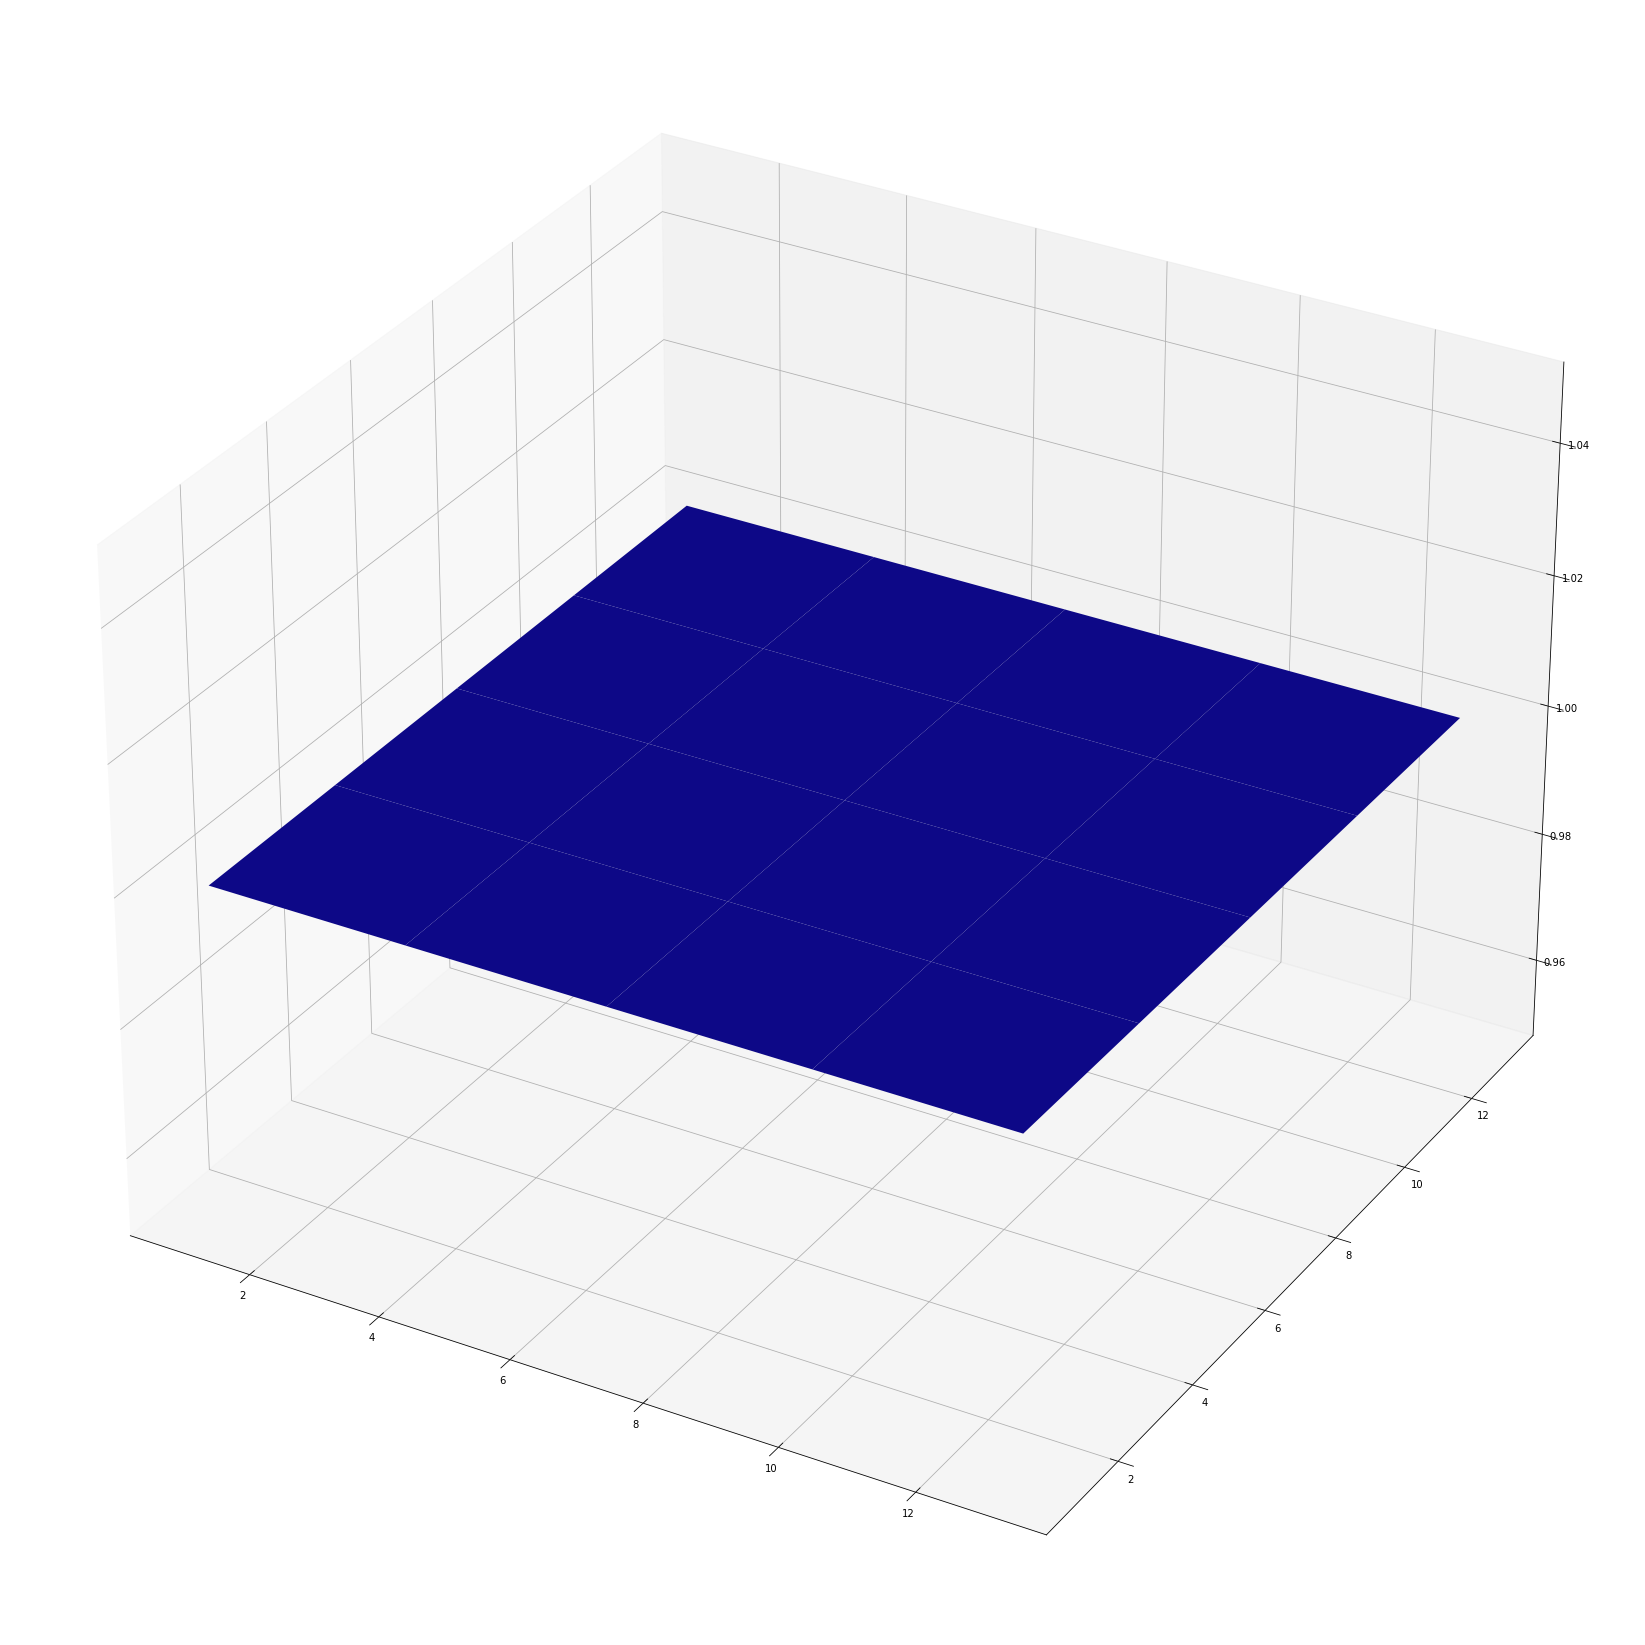

In [10]:
plt.rcParams['figure.figsize'] = [30, 30]

fig = plt.figure ()

ax = fig.add_subplot (111, projection="3d")

ax.plot_surface (inputLayer, hiddenLayer, Z, cmap="plasma", lw=0.5, rstride=1, cstride=1)

plt.show()


In [13]:
# inputLayer, hiddenLayer, Z

hiddenLayer

array([[ 1,  4,  7, 10, 13],
       [ 1,  4,  7, 10, 13],
       [ 1,  4,  7, 10, 13],
       [ 1,  4,  7, 10, 13],
       [ 1,  4,  7, 10, 13]])